## EDA on diabetes dataset

### Importing Libraries

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# % matplotlib_inline

### Reading dataset

In [18]:
# Reading dataset
df= pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [19]:
#checking Shape of dataframe
df.shape

(768, 9)

In [20]:
# Checking nulls
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [21]:
# Checking Duplicates
df.duplicated().sum()

np.int64(0)

In [22]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [23]:
#Checking datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [24]:
round(df.corr()*100,2)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,100.00,12.95,14.13,-8.17,-7.35,1.77,-3.35,54.43,22.19
Glucose,12.95,100.00,15.26,5.73,33.14,22.11,13.73,26.35,46.66
BloodPressure,14.13,15.26,100.00,20.74,8.89,28.18,4.13,23.95,6.51
SkinThickness,-8.17,5.73,20.74,100.00,43.68,39.26,18.39,-11.40,7.48
Insulin,-7.35,33.14,8.89,43.68,100.00,19.79,18.51,-4.22,13.05
BMI,1.77,22.11,28.18,39.26,19.79,100.00,14.06,3.62,29.27
DiabetesPedigreeFunction,-3.35,13.73,4.13,18.39,18.51,14.06,100.00,3.36,17.38
Age,54.43,26.35,23.95,-11.40,-4.22,3.62,3.36,100.00,23.84
Outcome,22.19,46.66,6.51,7.48,13.05,29.27,17.38,23.84,100.00


<Axes: >

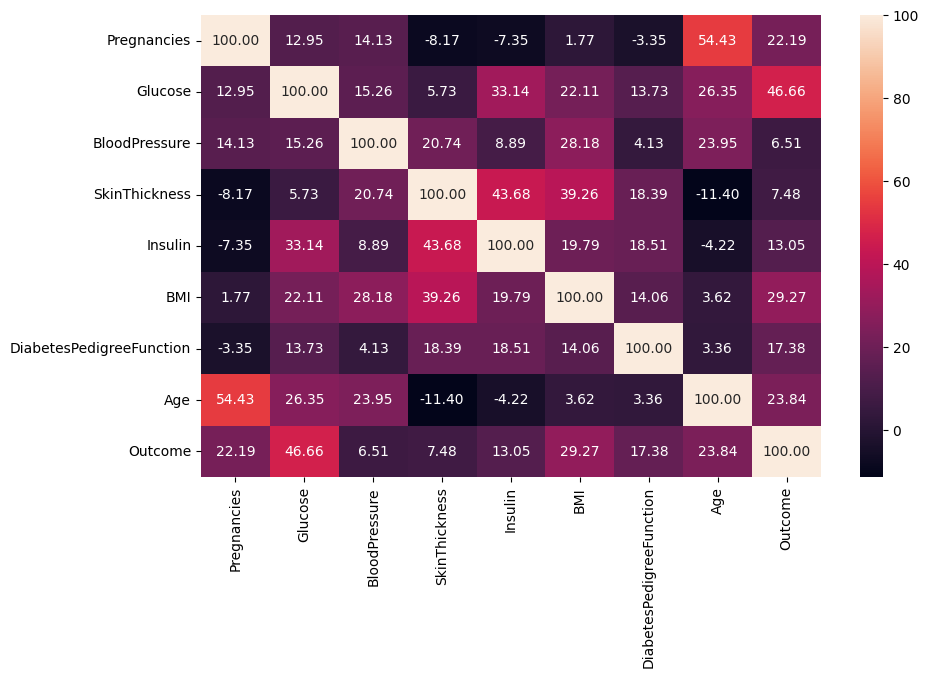

In [25]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr()*100, annot=True,fmt=".2f")


### Exploration

In [26]:
# Checking pregnancy column distribution
df_pregnancy=df.groupby("Pregnancies").agg(total_count=("Outcome","count"),true_count=("Outcome","sum"),false_count=("Outcome",lambda x:(x==0).sum()))
df_pregnancy["percentage"]=df_pregnancy["true_count"]*100/df_pregnancy["total_count"]
df_pregnancy.reset_index(inplace=True)

In [27]:

df_pregnancy.sort_values(by="percentage",ascending=False).head(10)

,Pregnancies,total_count,true_count,false_count,percentage
16,17,1,1,0,100.000000
15,15,1,1,0,100.000000
14,14,2,2,0,100.000000
9,9,28,18,10,64.285714
11,11,11,7,4,63.636364
8,8,38,22,16,57.894737
7,7,45,25,20,55.555556
13,13,10,5,5,50.000000
12,12,9,4,5,44.444444
10,10,24,10,14,41.666667


Text(0, 0.5, 'Count')

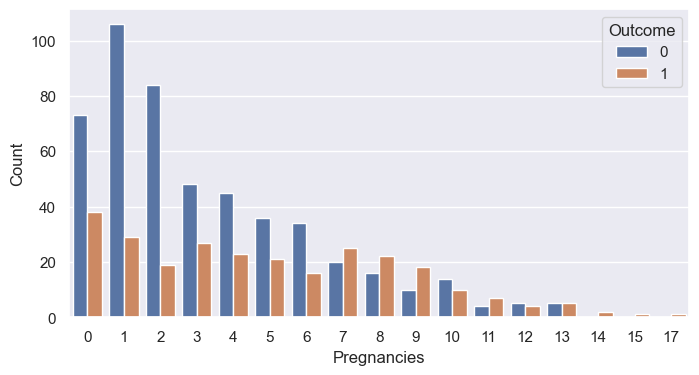

In [90]:
sns.countplot(data=df,x="Pregnancies",hue="Outcome")
plt.xlabel("Pregnancies")
plt.ylabel("Count")

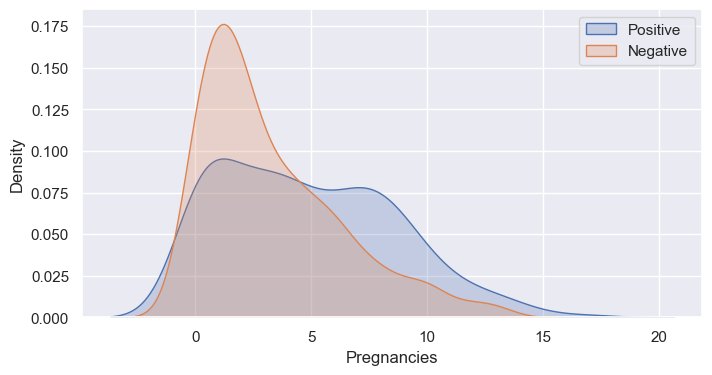

In [93]:
sns.set(rc={'figure.figsize':(8,4)})
sns.kdeplot(df[df["Outcome"] == 1]["Pregnancies"], fill=True,label="Positive")
sns.kdeplot(df[df["Outcome"] == 0]["Pregnancies"], fill=True,label="Negative")
plt.xlabel("Pregnancies")
plt.ylabel("Density")
plt.legend()

<Axes: xlabel='Pregnancies', ylabel='percentage'>

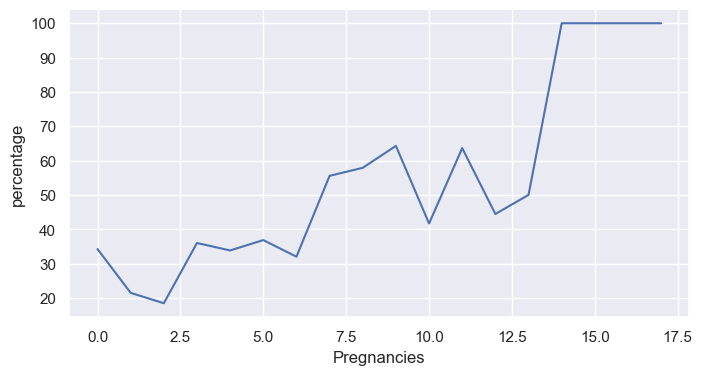

In [29]:
sns.set(rc={'figure.figsize':(8,4)})
sns.lineplot(x="Pregnancies",y="percentage",data=df_pregnancy)

### Findings
- Higher pregnancy counts show a clear trend of increased diabetes risk.

In [30]:
df["Age"].unique()

array([50, 31, 32, 21, 33, 30, 26, 29, 53, 54, 34, 57, 59, 51, 27, 41, 43,
       22, 38, 60, 28, 45, 35, 46, 56, 37, 48, 40, 25, 24, 58, 42, 44, 39,
       36, 23, 61, 69, 62, 55, 65, 47, 52, 66, 49, 63, 67, 72, 81, 64, 70,
       68])

In [39]:
df_age=df.groupby("Age").agg(total_count=("Outcome","count"),true_count=("Outcome","sum"),false_count=("Outcome",lambda x:(x==0).sum()))
df_age["percentage"]=df_age["true_count"]*100/df_age["total_count"]
df_age.reset_index(inplace=True)

df_age.sort_values(by="percentage",ascending=False).head(10)

,Age,total_count,true_count,false_count,percentage
49,70,1,1,0,100.000000
31,52,8,7,1,87.500000
22,43,13,11,2,84.615385
32,53,5,4,1,80.000000
26,47,6,4,2,66.666667
38,59,3,2,1,66.666667
33,54,6,4,2,66.666667
35,56,3,2,1,66.666667
15,36,16,10,6,62.500000
23,44,8,5,3,62.500000


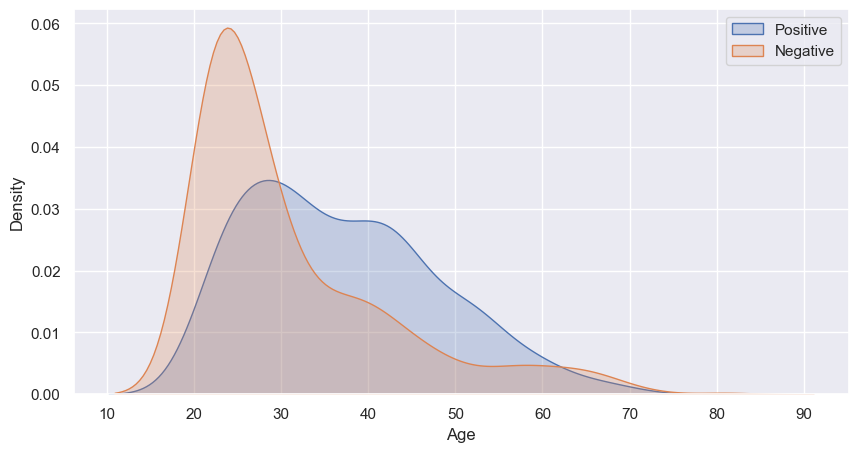

In [43]:
plt.figure(figsize=(10,5))
sns.kdeplot(df[df["Outcome"] == 1]["Age"], fill=True, label="Positive")
sns.kdeplot(df[df["Outcome"] == 0]["Age"], fill=True, label="Negative")
plt.xlabel("Age")
plt.ylabel("Density")
plt.legend()

In [104]:
more_age=df[(df["Age"]>=60) & (df["Outcome"]==1)]
more_age.shape
# more_age=df[(df["Age"]>=60)]
# print(more_age)

(9, 9)

### Findings

- Diabetes increases sharply with age and it common between 30 to 50 years 

- After age 40, the chances of being diabetic is consistently high.

- Young ages (<25) show the lowest diabetes positivity rates.

- Some age groups like (66,64,68,81) have weird 0% values due to low sample size, not actual pattern.

In [ ]:
df_glucose=df.groupby("Glucose").agg(total_count=("Outcome","count"),true_count=("Outcome","sum"),false_count=("Outcome",lambda x:(x==0).sum()))
df_glucose["percentage"]=df_glucose["true_count"]*100/df_glucose["total_count"]
df_glucose.reset_index(inplace=True)

df_glucose.sort_values(by="percentage",ascending=False).head(5)

,Glucose,total_count,true_count,false_count,percentage
110,172,1,1,0,100.0
114,176,2,2,0,100.0
109,171,3,3,0,100.0
125,188,2,2,0,100.0
131,195,2,2,0,100.0
135,199,1,1,0,100.0
132,196,3,3,0,100.0
134,198,1,1,0,100.0
119,181,5,5,0,100.0
116,178,1,1,0,100.0


<Axes: xlabel='Glucose', ylabel='percentage'>

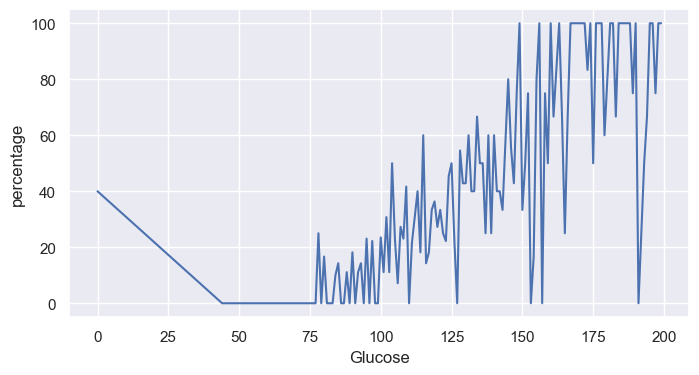

In [47]:
sns.lineplot(x="Glucose",y="percentage",data=df_glucose)

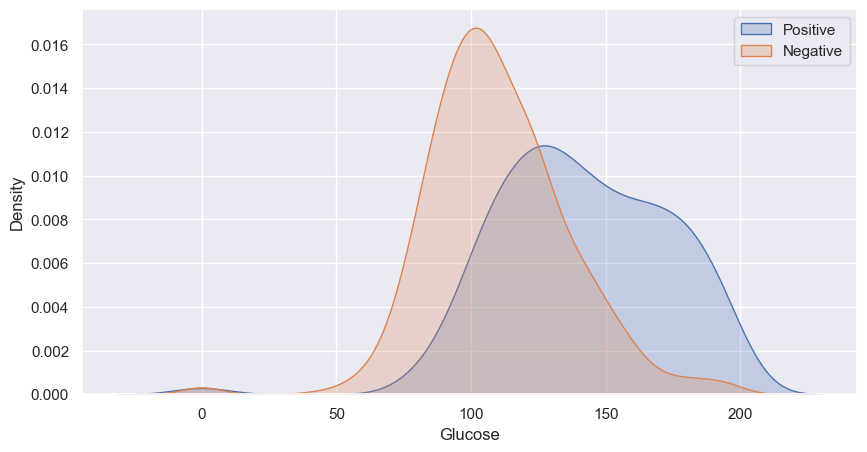

In [48]:
plt.figure(figsize=(10,5))
sns.kdeplot(df[df["Outcome"] == 1]["Glucose"], fill=True, label="Positive")
sns.kdeplot(df[df["Outcome"] == 0]["Glucose"], fill=True, label="Negative")
plt.xlabel("Glucose")
plt.ylabel("Density")
plt.legend()

### Findings
- Glucose level more than 150 show a clear diabetes risk.
- Glucose more than 100-150 is at moderate risk
- People having glucose less than 100 also having diabetes

In [80]:
les_glucose=df[(df["Glucose"]<=100) & (df["Outcome"]==1)]
print(les_glucose.shape)

(20, 9)


<Axes: >

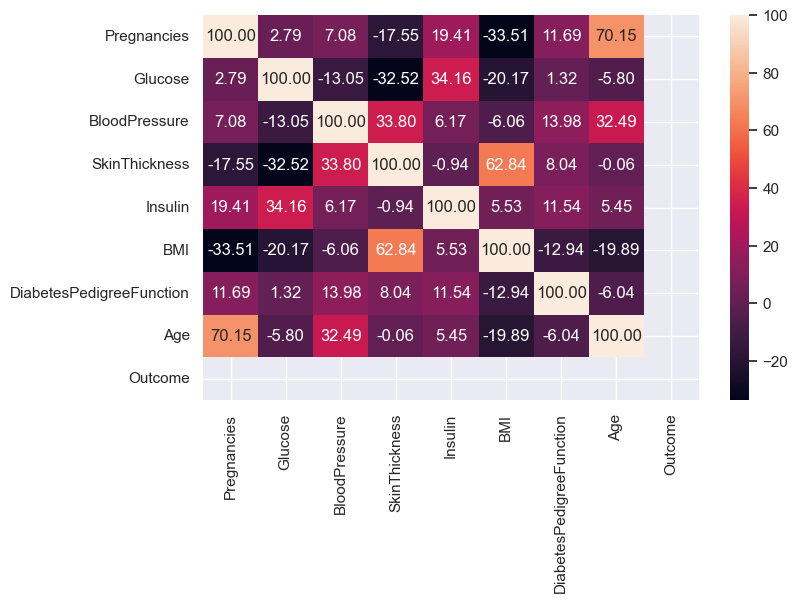

In [58]:
plt.figure(figsize=(8,5))
sns.heatmap(les_glucose.corr()*100,annot=True,fmt=".2f")


In [73]:
df_skin=df.groupby("SkinThickness").agg(total_count=("Outcome","count"),true_count=("Outcome","sum"),false_count=("Outcome",lambda x:(x==0).sum()))
df_skin["percentage"]=df_skin["true_count"]*100/df_skin["total_count"]
df_skin.reset_index(inplace=True)

df_skin.sort_values(by="percentage",ascending=False).head(3)

,SkinThickness,total_count,true_count,false_count,percentage
49,63,1,1,0,100.0
50,99,1,1,0,100.0
44,51,1,1,0,100.0


<Axes: xlabel='SkinThickness', ylabel='percentage'>

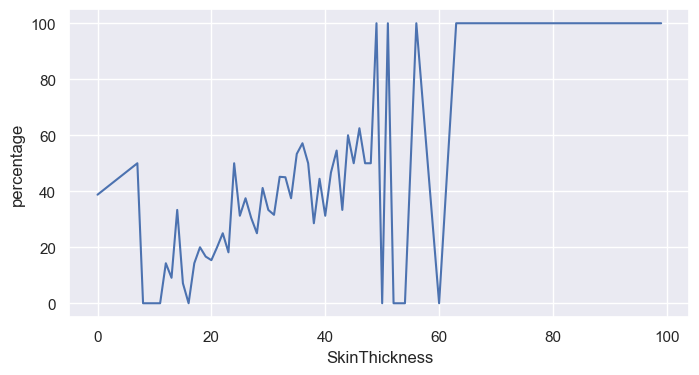

In [72]:
sns.lineplot(x="SkinThickness",y="percentage",data=df_skin)

### Findings
- Higher risk of diabetes as the skin thickness increase

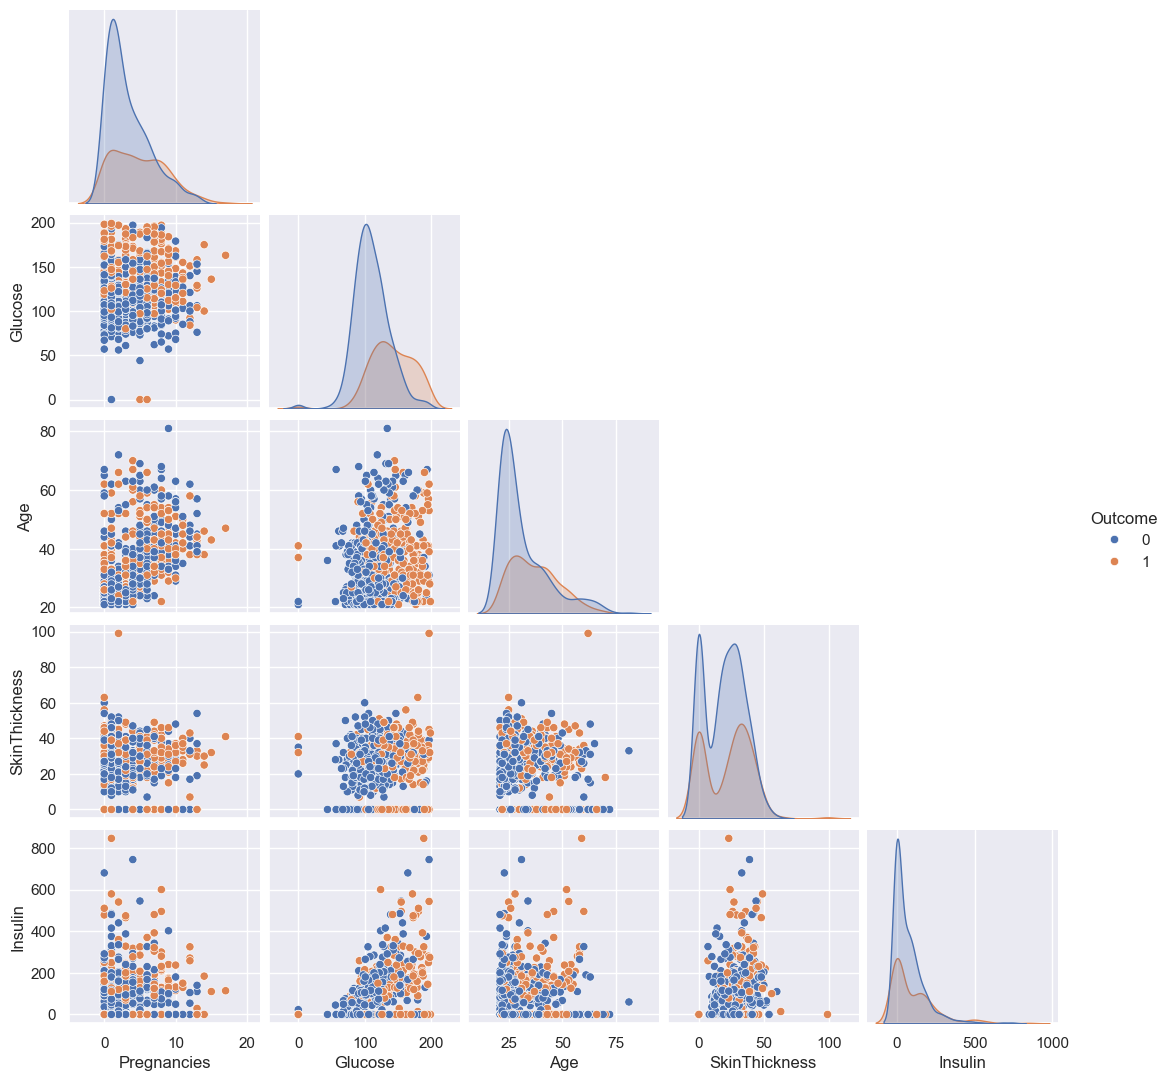

In [ ]:
cols = ["Pregnancies", "Glucose", "Age", "SkinThickness", "Insulin", "Outcome"]

sns.pairplot(df[cols],hue="Outcome",diag_kind="kde",corner=True,height=2.2)
plt.show()

In [ ]:
def detect_outliers_iqr(df):
    outliers = {}
    numeric_cols = df.select_dtypes(include=['int64','float64']).columns
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        outliers[col] = df[(df[col] < lower) | (df[col] > upper)].shape[0]
    return outliers

detect_outliers_iqr(df)


In [ ]:
def outliers_iqr(df):
    numeric = df.select_dtypes(include=['int64','float64']).columns
    
    outlier_rows = []
    outlier_summary = []

    for col in numeric:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        rows = df[(df[col] < lower) | (df[col] > upper)]
        r = rows.copy()
        r["outlier_column"] = col
        outlier_rows.append(r)
        outlier_summary.append([col, rows.shape[0]])
    outlier_rows_df = pd.concat(outlier_rows).reset_index(drop=True)
    outlier_summary_df = pd.DataFrame(outlier_summary, columns=["column","outlier_count"])

    return outlier_summary_df, outlier_rows_df


summary_df, all_outliers_df = outliers_iqr(df)


In [132]:
summary_df

,column,outlier_count
0,Pregnancies,4
1,Glucose,5
2,BloodPressure,45
3,SkinThickness,1
4,Insulin,34
5,BMI,19
6,DiabetesPedigreeFunction,29
7,Age,9
8,Outcome,0


<Axes: >

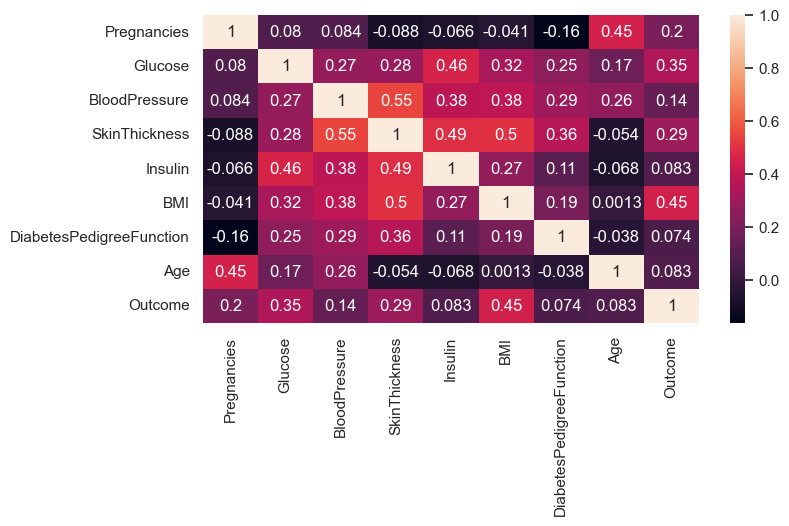

In [137]:
all_outliers_df.shape
# all_outliers_df.drop(columns=['outlier_column'], inplace=True)
sns.heatmap(all_outliers_df.corr(),annot=True)

### Findings 
- In outliers Skin Thickness, Glucose and BMI is impacting majorly